# Task 6.2 Exploring Relationship

### Project Name : New York city bike riders rental analysis

### steps
#### step 1 importing libraries and data
#### step 2 correllation matrix
#### step 3 scatter plot
#### step 4 pair plots
####  step 5 categorical plot
#### step 6 questions and answers 
#### step 7 hypothesis
#### step 8 export data 


## step 1: Importing libraries and data set 

### step 1.1 importing libraries

In [1]:
# importing visualization libraries for 'citybike_cleaned' data set 
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
import scipy
import calendar



### step 1.2 importing 'citybike' data set 

##### creating a folder path for the data set

##### importing the 'citybike_cleaned' dataset 

In [2]:
# creating folder bath 
path = r"C:\Users\solza\Downloads\02-11-2023"

In [3]:
# importing 'citybike_cleaned' from prepared folder;
df_citybike_cleaned = pd.read_csv(r"C:\Users\solza\Downloads\02-11-2023\prepared\citybike_cleaned.csv")

In [4]:
# checking shapes and dimensions;
df_citybike_cleaned.shape

(50000, 18)

In [5]:
df_citybike_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               50000 non-null  int64  
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

In [6]:
df_citybike_cleaned.head()

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,gender,Rider_Gender
0,0,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,2,Female
1,1,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1,Male
2,2,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1,Male
3,3,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,2,Female
4,4,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,0,Unknown


In [7]:
# deleting 'unnamed' and 'gender' dataset, which is unnecessary for this analysis;
df_citybike_cleaned = df_citybike_cleaned.drop(columns = ['Unnamed: 0','gender'])

In [8]:
df_citybike_cleaned.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,Rider_Gender
0,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,Female
1,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,Male
2,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,Male
3,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,Female
4,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,Unknown


In [9]:
df_citybike_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_id                  50000 non-null  int64  
 1   weekday                  50000 non-null  object 
 2   start_hour               50000 non-null  int64  
 3   start_time               50000 non-null  object 
 4   start_station_id         50000 non-null  int64  
 5   start_station_name       50000 non-null  object 
 6   start_station_latitude   50000 non-null  float64
 7   start_station_longitude  50000 non-null  float64
 8   end_time                 50000 non-null  object 
 9   end_station_id           50000 non-null  int64  
 10  end_station_name         50000 non-null  object 
 11  end_station_latitude     50000 non-null  float64
 12  end_station_longitude    50000 non-null  float64
 13  trip_duration            50000 non-null  int64  
 14  subscriber            

In [10]:
#confirming dataframe shape;
df_citybike_cleaned.shape

(50000, 16)

## step 2 correlation martix

In [11]:
## creating a correlation matrix;
df_citybike_cleaned.corr()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration
bike_id,1.000000,-0.000866,0.003608,-0.009604,-0.002193,0.002357,-0.006955,-0.001598,0.003365
start_hour,-0.000866,1.000000,-0.001270,-0.009121,-0.045734,0.004045,-0.036941,0.007160,0.040870
start_station_id,0.003608,-0.001270,1.000000,0.106504,0.082925,0.069007,0.061167,0.025818,0.061655
start_station_latitude,-0.009604,-0.009121,0.106504,1.000000,0.211969,0.059723,0.585463,0.078218,-0.025321
start_station_longitude,-0.002193,-0.045734,0.082925,0.211969,1.000000,0.024363,0.093074,0.418376,-0.007220
end_station_id,0.002357,0.004045,0.069007,0.059723,0.024363,1.000000,0.107011,0.088185,0.059549
end_station_latitude,-0.006955,-0.036941,0.061167,0.585463,0.093074,0.107011,1.000000,0.200080,-0.044033
end_station_longitude,-0.001598,0.007160,0.025818,0.078218,0.418376,0.088185,0.200080,1.000000,0.001111
trip_duration,0.003365,0.040870,0.061655,-0.025321,-0.007220,0.059549,-0.044033,0.001111,1.000000


In [12]:
df_citybike_cleaned.shape

(50000, 16)

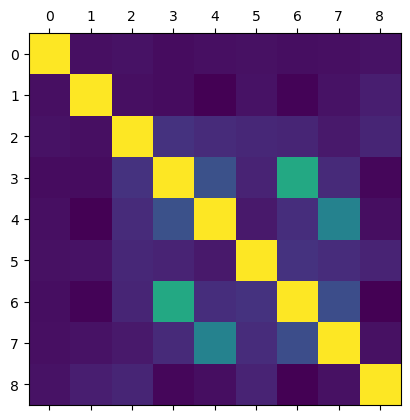

In [13]:
# craete a correlation heatmap using matplotlib ;
plt.matshow(df_citybike_cleaned.corr())
plt.show()

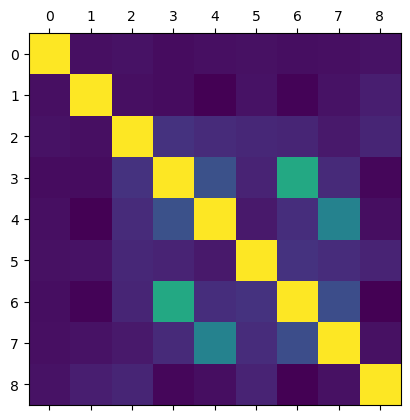

In [14]:
# save figure 
plt.matshow(df_citybike_cleaned.corr())
plt.savefig('out.png')

In [15]:
# to know the working directory
# current directly
cwd = os.getcwd()
cwd

'C:\\Users\\solza\\Downloads'

Text(0.5, 1.0, 'Correlation Matrix')

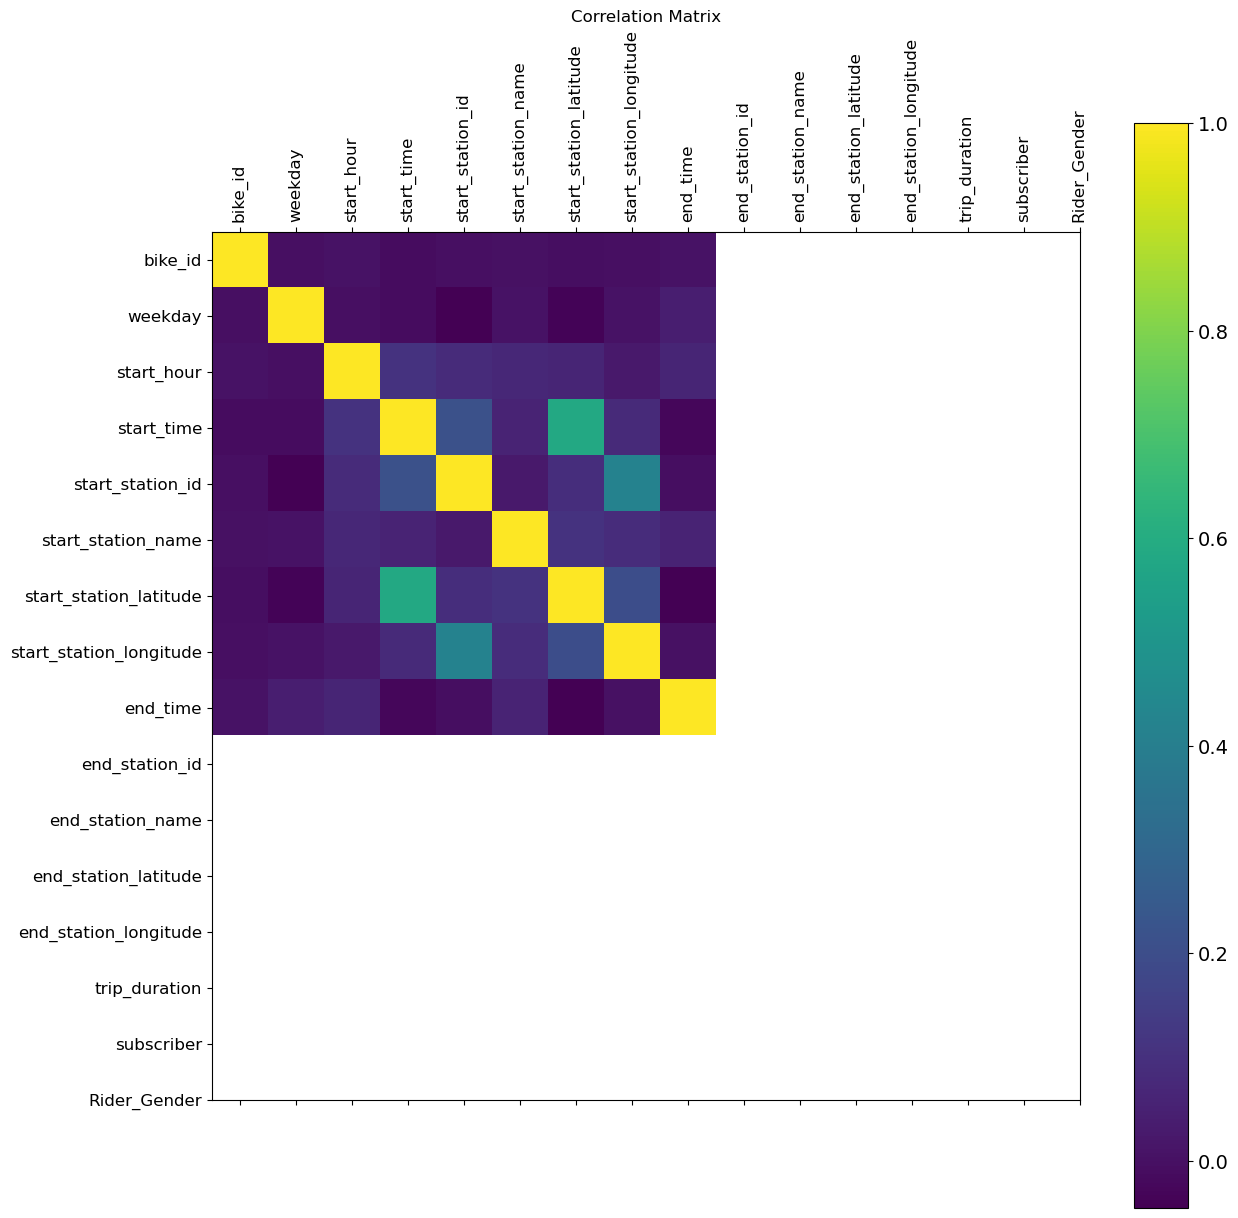

In [16]:
# Add Labels, a Legend, and Change the Size of the Heatmap; 

f = plt.figure(figsize=(14, 14)) # figure size 
plt.matshow(df_citybike_cleaned.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_citybike_cleaned.shape[1]), df_citybike_cleaned.columns, fontsize=12, rotation = 90) # x axis labels
plt.yticks(range(df_citybike_cleaned.shape[1]), df_citybike_cleaned.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title


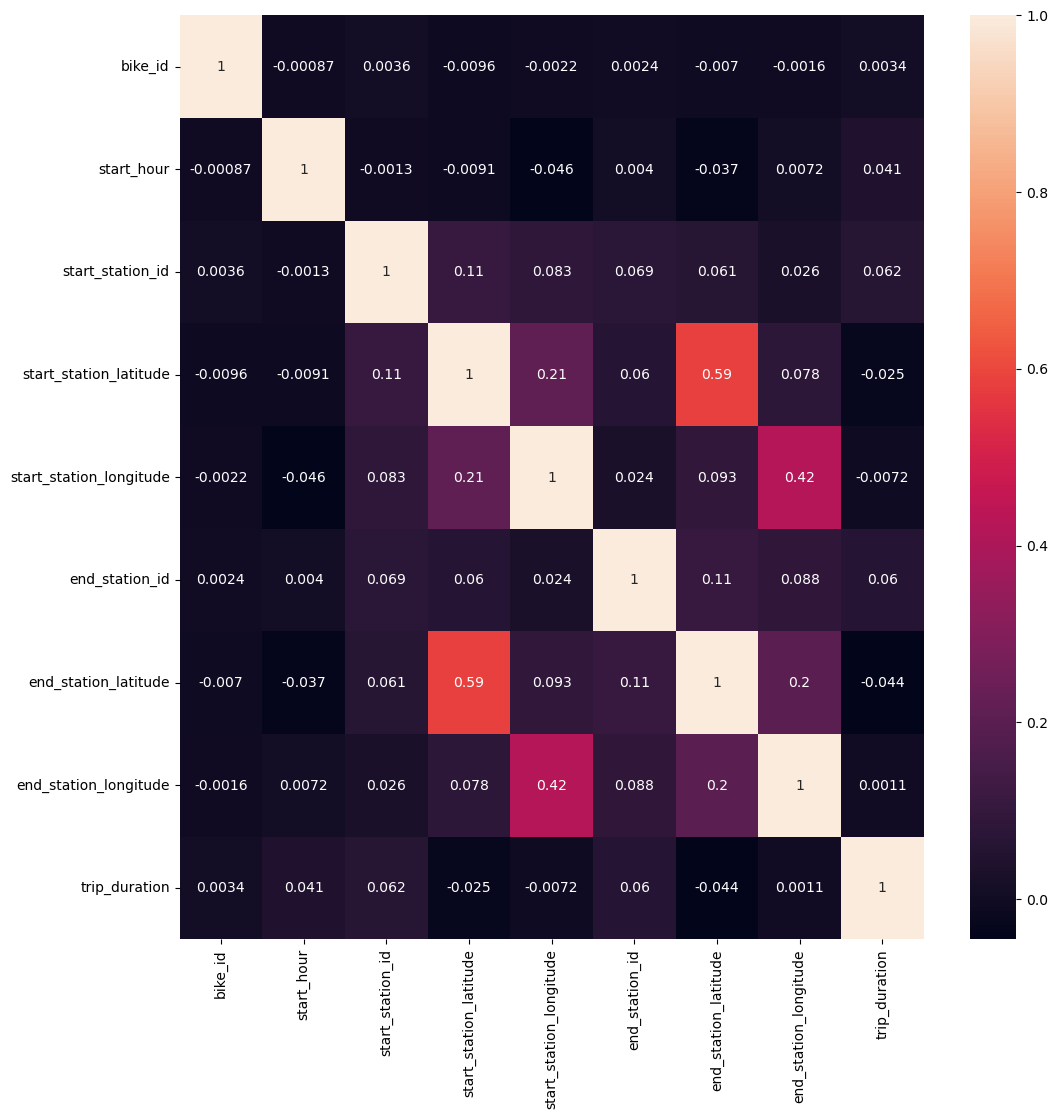

In [17]:
# Creating a Subplot with Matplotlib;

f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(df_citybike_cleaned.corr(), annot = True, ax = ax) 

    # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

### Outcome: Seems to be a moderate relationship between 'Start_Station_Latitude' and 'End_Station_Latitude' with a Correlation Co-Efficient of 0.59.

## step 3 scatterplot

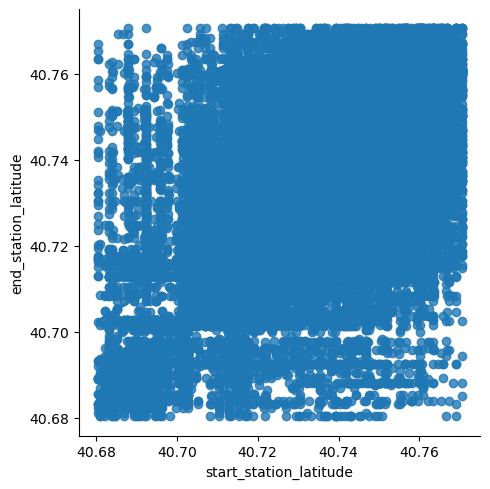

In [18]:
#Step 3.1: Creating a Scatterplot on 'Start_Station_Latitude' and 'End_Station_Latitude' Columns in Seaborn; 

sns.lmplot(x = 'start_station_latitude', y = 'end_station_latitude', data = df_citybike_cleaned)


###  Notes: The correlation results may not be in line with the heatmap.

## step 4 pair plot 

In [19]:
# Creating Pair Plots with Selected Variables;

df_PairPlots = df_citybike_cleaned[['start_station_latitude', 'start_hour', 'trip_duration', 'end_station_latitude']]

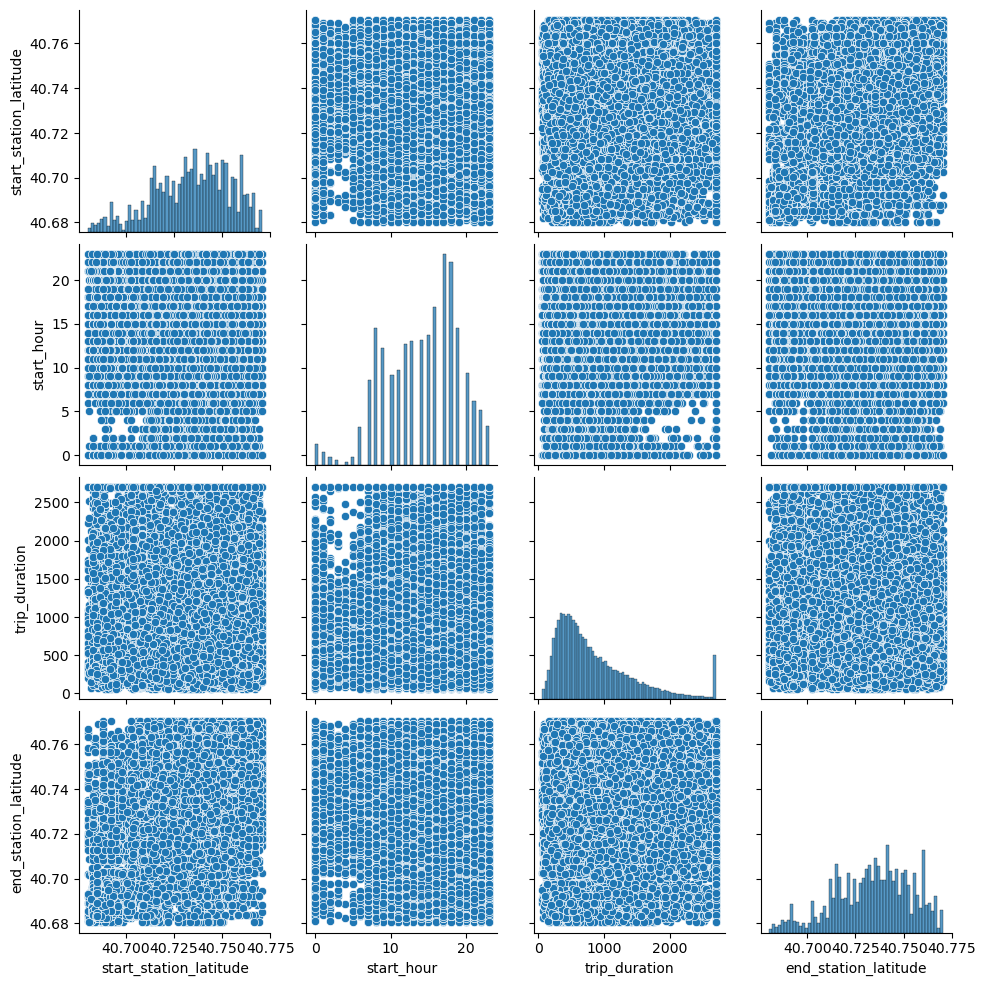

In [20]:
# Creating a Pair Plot;  

g = sns.pairplot(df_PairPlots)

## step 5 categorical plots 

<AxesSubplot:xlabel='start_station_latitude', ylabel='Count'>

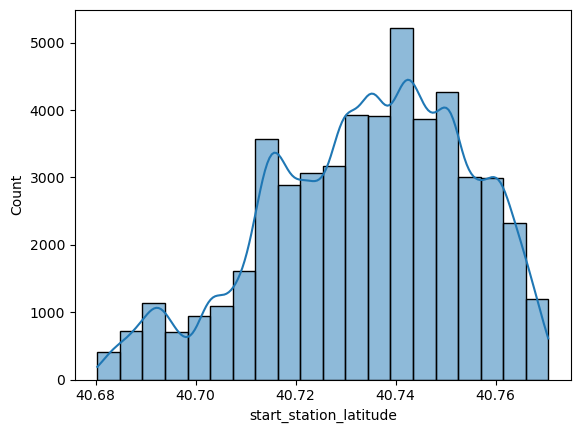

In [21]:
# Creating a Histogram of 'Start_Station_Latitude' Variable; 

sns.histplot(df_citybike_cleaned['start_station_latitude'], bins = 20, kde = True)


<AxesSubplot:xlabel='end_station_latitude', ylabel='Count'>

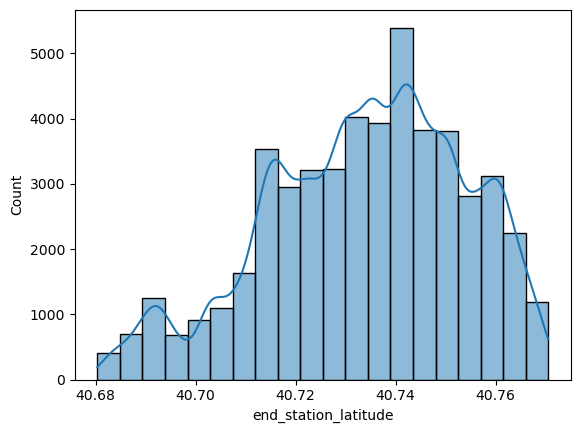

In [22]:
# Creating a Histogram of 'End_Station_Latitude' Variable; 

sns.histplot(df_citybike_cleaned['end_station_latitude'], bins = 20, kde = True)

In [23]:
# Defining Categorical Variables: "Start_Station_Latitude" with Categories; High, Mid & Low; 

df_citybike_cleaned.loc[df_citybike_cleaned['start_station_latitude'] < 40.70, 'Distance'] = 'Low_Latitude'
df_citybike_cleaned.loc[(df_citybike_cleaned['start_station_latitude'] >= 40.70) & (df_citybike_cleaned['start_station_latitude'] < 40.74), 'Distance'] = 'Mid_Latitude'
df_citybike_cleaned.loc[df_citybike_cleaned['start_station_latitude'] >= 40.74, 'Distance'] = 'High_Latitude'


In [24]:
# Checking the Distance Variable Distribution; 

df_citybike_cleaned['Distance'].value_counts(dropna = False)


Mid_Latitude     25472
High_Latitude    21476
Low_Latitude      3052
Name: Distance, dtype: int64

In [25]:
df_citybike_cleaned.columns

Index(['bike_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'Rider_Gender', 'Distance'],
      dtype='object')

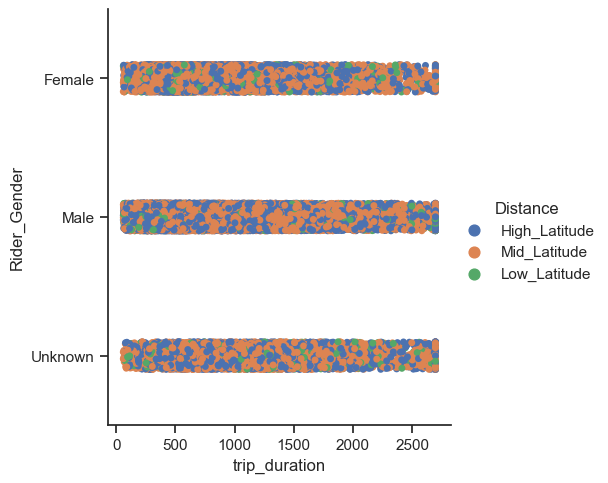

In [26]:
# Creating a Categorical Plot in Seaborn Using 'Distance' Category;

sns.set(style="ticks")
g = sns.catplot(x="trip_duration", y="Rider_Gender", hue="Distance", data=df_citybike_cleaned)


### Notes: Seems like most riders of all gender covered shorter distance (Mid-Range).

In [27]:
#Saving Visual fig = g.get_figure(); 

g.savefig("CatPlot1.png") 


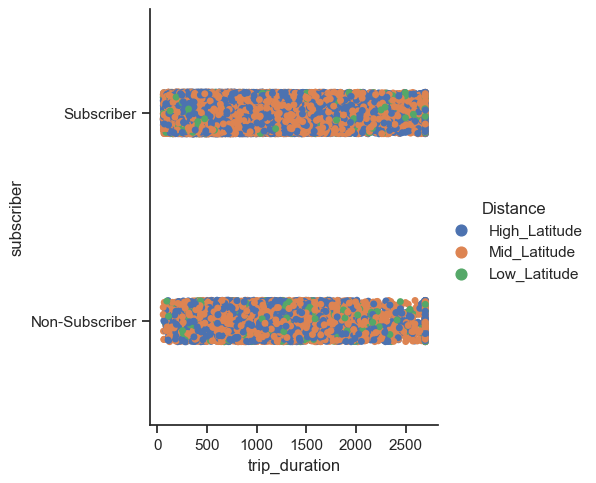

In [28]:
#Creating a Categorical Plot in Seaborn Using 'Distance' Category;

sns.set(style="ticks")
g2 = sns.catplot(x="trip_duration", y="subscriber", hue="Distance", data=df_citybike_cleaned)

In [29]:
#Saving Visual fig = g.get_figure(); 

g2.savefig("CatPlot2.png") 


### value counts ;

In [30]:
#Checking Member_Status Variable Distribution; 

df_citybike_cleaned['subscriber'].value_counts(dropna = False)

Subscriber        43021
Non-Subscriber     6979
Name: subscriber, dtype: int64

In [31]:
#Checking MStart_Station_Name Variable Distribution; 

df_citybike_cleaned['start_station_name'].value_counts(dropna = False)

W 20 St & 11 Ave                 536
Lafayette St & E 8 St            505
Pershing Square N                503
E 17 St & Broadway               496
West St & Chambers St            465
                                ... 
Park Ave & St Edwards St          11
Cadman Plaza E & Red Cross Pl     11
Franklin Ave & Myrtle Ave          8
Railroad Ave & Kay Ave             5
7 Ave & Farragut St                5
Name: start_station_name, Length: 330, dtype: int64

In [32]:
#Checking End_Station_Name Variable Distribution; 

df_citybike_cleaned['end_station_name'].value_counts(dropna = False)

E 17 St & Broadway           572
W 20 St & 11 Ave             525
West St & Chambers St        470
8 Ave & W 31 St              439
Lafayette St & E 8 St        430
                            ... 
Park Ave & St Edwards St      10
Monroe St & Classon Ave        9
7 Ave & Farragut St            7
Franklin Ave & Myrtle Ave      7
Railroad Ave & Kay Ave         6
Name: end_station_name, Length: 330, dtype: int64

In [33]:
#Checking Gender Variable Distribution; 

df_citybike_cleaned['Rider_Gender'].value_counts(dropna = False)

Male       32361
Female     10658
Unknown     6981
Name: Rider_Gender, dtype: int64

In [34]:
#Checking Weekday Variable Distribution; 

df_citybike_cleaned['weekday'].value_counts(dropna = False)

Mon    7715
Sun    7319
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Name: weekday, dtype: int64

In [35]:
#Checking Start_Hour Variable Distribution; 

df_citybike_cleaned['start_time'].value_counts(dropna = False)

9/19/2013 17:55    11
9/30/2013 18:44    10
9/16/2013 18:27    10
9/10/2013 18:14     9
9/3/2013 18:30      9
                   ..
9/4/2013 20:33      1
9/11/2013 9:58      1
9/25/2013 10:23     1
9/15/2013 7:47      1
9/23/2013 21:54     1
Name: start_time, Length: 24183, dtype: int64

## Questions To Explore

### 1. which station experience the highest pickups? most popular stations by start pickup and end(drop of ) locations 

     Start Station Name          Pick up Counts           End Station Name               Drop-Off Counts

      w 20 st & 11 Ave              536                    E 17 St & Broadway               572
      Lafayette St & E 8 St         505                      W 20 St & 11 Ave               525
      Pershing Square N             503                    West St & Chambers St            470                                 
      E 17 St & Broadway            496                    8 Ave & W 31 St                  439
      West St & Chambers St         465                    Lafayette St & E 8 St            430



## 2. Does gender has any impact on length of rental or membership status ?

Male riders lead with rental ata slightly over 32,000, but  we have unknown gender characterstics not well defined.

## 3. what day has the largest renters or busiest day ?

monday has the highest riders at 7715 where as sunday ( 7319), and friday (7309), which are closet to eahc other.

## 4. What time frame has the most bikes usage ? what is the busiest time of the day ?

riders are on the move more around 17:00 (5070) and 18:00 (4871)

## 5. type of members with highest rides/ rentals ?

subscribed riders lead with rental at slightly over 43,000


## Hypothesis:
 
 So far based on the analysis results we can stick with task 6.1 hypothesis stating:
 
 ### => more male leads in bikes rental than female 


## Exporting 'citybike' data set 

In [37]:
## exporting updated 'citybike_cleaned' dataset;
df_citybike_cleaned.to_csv(os.path.join(path, 'prepared', 'citybike_T62.csv'))